# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [88]:
def P1(num_examples=5):
    ### STUDENT START ###

    #list comprehension loop over first 5 labels and examples in the training data
    [print("---------\n**Label: ",train_labels[i], " - ", newsgroups_train.target_names[train_labels[i]],
           "\n\n**Data:", train_data[i] ,"\n", sep="")
     for i in range(num_examples)]

        ### STUDENT END ###

P1(5)

---------
**Label: 1 - comp.graphics

**Data:Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

---------
**Label: 3 - talk.religion.misc

**Data:

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating s

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [186]:
def P2():
    ### STUDENT START ###

    #PART 1 -------------
    print("Part 1: BASE CountVectorizer")
    vectorizer1 = CountVectorizer()
    X = vectorizer1.fit_transform(train_data)

    #nnz, Get the count of explicitly-stored values (nonzeros)
    print("What is the size of the vocabulary?")
    print(X.nnz)
    print()

    #shape, (2-tuple) Shape of the matrix
    print("What is the average number of non-zero features per example?")
    print(np.sum(np.sum(X.toarray()))/X.shape[0], "~=", int(np.sum(np.sum(X.toarray()))/X.shape[0]))  
    print()

    print("What is the fraction of the non-zero entries in the matrix?")
    print(np.sum(np.sum(X.toarray()))/(X.shape[0]*X.shape[1]))    
    print()

    print("What are the 0th and last feature strings (in alphabetical order)?")      
    print("First:", vectorizer.get_feature_names()[0], "\nLast:", vectorizer.get_feature_names()[-1])
    print()

    #Part 2 -------------
    print("Part 2: Custom Vocab")
    vocab = {"atheism":0, "graphics":1, "space":2, "religion":3}
    
    vectorizer2 = CountVectorizer(vocabulary = vocab)
    X = vectorizer2.transform(train_data)
    
    #nnz, Get the count of explicitly-stored values (nonzeros)
    print("What is the size of the vocabulary?")
    print(X.nnz)
    print()

    
    #shape, (2-tuple) Shape of the matrix
    print("What is the average number of non-zero features per example?")
    print(np.sum(np.sum(X.toarray()))/X.shape[0], "~=", round(np.sum(np.sum(X.toarray()))/X.shape[0],0))  
    print()

    #Part 3 -------------
    print("Part 3: Bigram and Trigam Character Features")
    vectorizer3 = CountVectorizer(analyzer = 'char_wb', ngram_range = (2, 3))
    X = vectorizer3.fit_transform(train_data)
    
    print("What is the size of the vocabulary?")
    print(X.nnz)
    print()
    
    #Part 4 -------------
    print("Part 4: Prune unigram words that appear in fewer than 10 documents")
    vectorizer4 = CountVectorizer(min_df = 10)
    X = vectorizer4.fit_transform(train_data)
    
    print("What is the size of the vocabulary?")
    print(X.nnz)
    print()
    
    #Part 5 -------------    
    print("Part 5: The fraction of words in the development vocabulary that is missing from the training vocabulary")
    vectorizer5_train = CountVectorizer()
    vectorizer5_dev = CountVectorizer()
    X = vectorizer5_train.fit_transform(train_data)
    Y = vectorizer5_dev.fit_transform(dev_data)
    
    print(abs((Y.nnz - X.nnz))/X.nnz)
    
    ### STUDENT END ###

P2()

Part 1: BASE CountVectorizer
What is the size of the vocabulary?
196700

What is the average number of non-zero features per example?
185.43362831858408 ~= 185

What is the fraction of the non-zero entries in the matrix?
0.006898829134959785

What are the 0th and last feature strings (in alphabetical order)?
First: 00 
Last: zyxel

Part 2: Custom Vocab
What is the size of the vocabulary?
546

What is the average number of non-zero features per example?
0.9410029498525073 ~= 1.0

Part 3: Bigram and Trigam Character Features
What is the size of the vocabulary?
1164634

Part 4: Prune unigram words that appear in fewer than 10 documents
What is the size of the vocabulary?
147823

Part 5: The fraction of words in the development vocabulary that is missing from the training vocabulary
0.6221301474326385


### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

#### Part 3 - 1: KNeighbors

Rough pass over the following K values:  [1.0, 11.0, 21.0, 31.0, 41.0, 51.0, 61.0, 71.0, 81.0, 91.0, 101.0, 111.0, 121.0, 131.0, 141.0, 151.0, 161.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0]
Maximum F1-Score: 0.44351701732635396 around K = 121.0


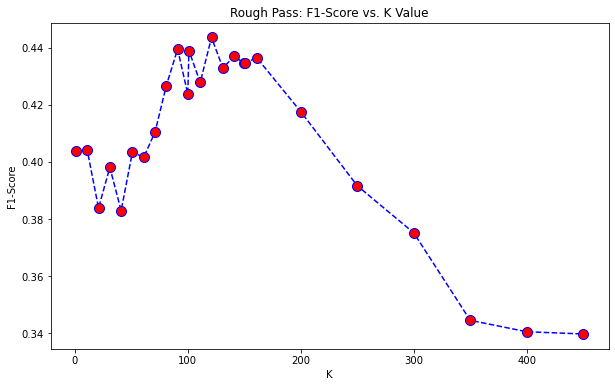

Fine pass over the following K values:  range(118, 126)
calculating F1 score at: 
k=118, k=119, k=120, k=121, k=122, k=123, k=124, k=125, Fine Pass: Maximum F1-Score: 0.4713168466403966 at K = 122


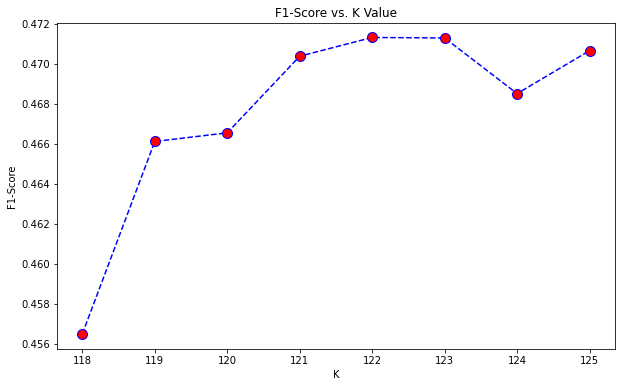

In [95]:
%matplotlib inline

def P3_1():
    ### STUDENT START ###
    
    #transform the text features
    vectorizer = CountVectorizer()
    train_data_transformed = vectorizer.fit_transform(train_data).toarray()
    test_data_transformed = vectorizer.transform(test_data).toarray()
    
    #---------------------------------#

    #PART 1:
    
    #Rough Pass - previously run results and saved to output folder to reduce computation time. See Finer Pass code  for algorithm used.
    #import and concatenate two k ranges that were found to have local maximums for f1 score
    range_imp_0 = list(np.loadtxt('outputs/project2_part3_krange k_max-161.out'))
    range_imp_1 = list(np.loadtxt('outputs/project2_part3_krange k_max-450.out'))
    range_imp = range_imp_0 + range_imp_1
    
    #import and concatenate the corresponding f1 scores
    f1_score_imp_0 = list(np.loadtxt('outputs/project2_part3_optF1_score k_max-161.out'))
    f1_score_imp_1 = list(np.loadtxt('outputs/project2_part3_optF1_score k_max-450.out'))
    f1_score_imp = f1_score_imp_0 + f1_score_imp_1
    
    #create a 2 column numpy array from the imported k range and corresponding f1 score
    f1_np_imp = np.array([range_imp, f1_score_imp])

    # Sort 2D numpy array by 0th Row
    f1_np_imp_sorted = f1_np_imp[ :, f1_np_imp[0].argsort()]

    #plot the np array
    plt.figure(figsize=(10,6))
    plt.plot(f1_np_imp_sorted[0], f1_np_imp_sorted[1],color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title('Rough Pass: F1-Score vs. K Value')
    plt.xlabel('K')
    plt.ylabel('F1-Score')
    print("Rough pass over the following K values: ", range_imp)
    print("Rough pass maximum F1-Score:",max(f1_score_imp),
          "around K =",range_imp[f1_score_imp.index(max(f1_score_imp))])
    plt.show()
    
    
    #---------------------------------#
    
    #Part 2:
    
    #Fine Pass - previously ran with a larger step save and saved results as 'rough pass'
    
    #initialize an empty list to store f1 scores for various k values
    f1_score_kneigh = []
    
    #create the fine pass k range from the rough pass local maximum
    step = 1
    k_range_i = range(118,126,step)
    
    print("Fine pass over the following K values: ", k_range_i)
    print("calculating F1 score at: ")
    
    #loop over the k-range
    for i in k_range_i:
        print("k=", i,sep = "", end = ", ")
        #create a K nearest neighbor model
        neigh = KNeighborsClassifier(n_neighbors=i)
        
        #fit the transformed training data
        neigh.fit(train_data_transformed, train_labels)
        
        #predict the test values from the k nearest neighbor model
        test_data_pred = neigh.predict(test_data_transformed)
        
        #calculate the f1 score
        f1_score_kneigh.append(metrics.f1_score(test_labels, test_data_pred, average="weighted"))

    
    #Plot the results from the loop
    plt.figure(figsize=(10,6))
    plt.plot(k_range_i, f1_score_kneigh, color='blue', linestyle='dashed', 
             marker='o', markerfacecolor='red', markersize=10)
    plt.title('F1-Score vs. K Value')
    plt.xlabel('K')
    plt.ylabel('F1-Score')
    
    print()
    print("Fine pass maximum F1-Score:",max(f1_score_kneigh),
          "at K =",k_range_i[f1_score_kneigh.index(max(f1_score_kneigh))])
    
    #save results to an output folder. This step is where the Rough pass data came from
    out_txt = 'outputs/project2_part3_optF1_score' + ' k_max-' + str(max(k_range_i)) + '.out'
    np.savetxt(out_txt, f1_score_kneigh, delimiter=',')
    range_txt = 'outputs/project2_part3_krange' + ' k_max-' + str(max(k_range_i)) + '.out'
    np.savetxt(range_txt, k_range_i, delimiter=',')

    ### STUDENT END ###

P3_1()

#### Part 3 - 2: Naive Bayes


/Users/ls_enel/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Maximum F1-Score: 0.7597200053010889 at K = 1.0


/Users/ls_enel/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Maximum F1-Score: 0.783690801367712 at Alpha = 0.2


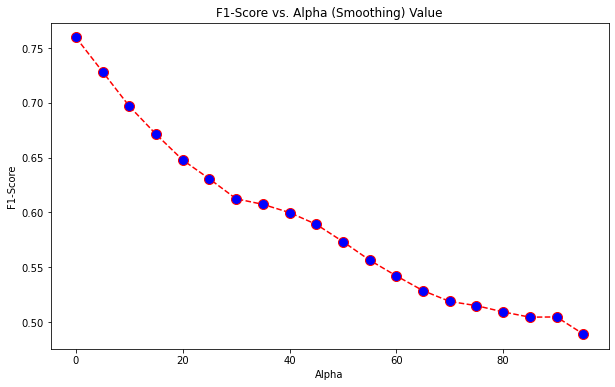

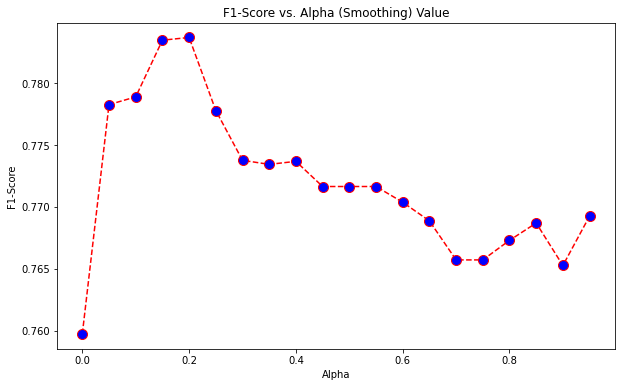

In [96]:
def P3_2():
    #transform the text features
    vectorizer = CountVectorizer()
    train_data_transformed = vectorizer.fit_transform(train_data).toarray()
    test_data_transformed = vectorizer.transform(test_data).toarray()
    
    #Rough Pass - this model runs much faster than k-nearest neighbors so I didn't save results to an output folder
    
    #Initialize list to store NB f1 scores
    f1_score_NB = []
    step = 1
    alpha_range_i = np.arange(0.0, 100, 5)
    
    #loop over alpha values for NB
    for i in alpha_range_i:
        #create a NB model
        NB = MultinomialNB(alpha=i)
        
        #fit the transformed data
        NB.fit(train_data_transformed, train_labels)
        
        #predict the label for the test data and store the results
        test_data_pred = NB.predict(test_data_transformed)
        f1_score_NB.append(metrics.f1_score(test_labels, test_data_pred,average="weighted"))
    
    #Plot the results of the rough pass
    plt.figure(figsize=(10,6))
    plt.plot(alpha_range_i,f1_score_NB,color='red', linestyle='dashed', 
             marker='o',markerfacecolor='blue', markersize=10)
    plt.title('Rough Pass: F1-Score vs. Alpha (Smoothing) Value')
    plt.xlabel('Alpha')
    plt.ylabel('F1-Score')
    plt.show()
    print("Rough pass Maximum F1-Score:",max(f1_score_NB),
          "at K =",alpha_range_i[f1_score_NB.index(max(f1_score_NB))]+step)

    #Finer Pass - loop over local maximum from rough pass and plot results
    f1_score_NB = []
    step = 0.05
    alpha_range_i = np.arange(0.0, 1, step)
    for i in alpha_range_i:
        NB = MultinomialNB(alpha=i)
        NB.fit(train_data_transformed, train_labels)
        test_data_pred = NB.predict(test_data_transformed)
        f1_score_NB.append(metrics.f1_score(test_labels, test_data_pred, average="weighted"))

    plt.figure(figsize=(10,6))
    plt.plot(alpha_range_i,f1_score_NB,color='red', linestyle='dashed', 
             marker='o',markerfacecolor='blue', markersize=10)
    plt.title('F1-Score vs. Alpha (Smoothing) Value')
    plt.xlabel('Alpha')
    plt.ylabel('F1-Score')
    print("Fine pass Maximum F1-Score:",max(f1_score_NB),
          "at Alpha =",alpha_range_i[f1_score_NB.index(max(f1_score_NB))])

    
P3_2()

#### Part 3-3: 

0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 
Maximum F1-Score: 0.7490304976136087 at C = 0.39


<Figure size 864x576 with 0 Axes>

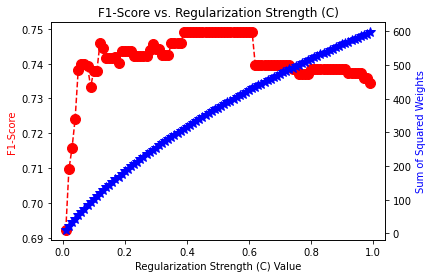

In [97]:
def P3_3():
    #transform the text features
    vectorizer = CountVectorizer()
    train_data_transformed = vectorizer.fit_transform(train_data).toarray()
    test_data_transformed = vectorizer.transform(test_data).toarray()
    
    #F1 score continously decreased beyond c = 1 so I only ran a fine pass plot over c from 0 to 1
    
    #Initialize list to store logistic regression f1 scores
    f1_score_LR = []
    weights_LR = []
    step = 0.01
    c_range_i = np.arange(0.01, 1, step)
    
    #loop over varius regulation strengths (c)
    print("Calculating the F1 score for the following regularization strenghts:", c_range_i)
    for i in c_range_i:
        print(round(i,3), end=", ")
        #create, fit, and predict the logistic regression model using the transformed training and test data
        LogisReg = LogisticRegression(C=i, solver="liblinear", multi_class="auto")
        LogisReg.fit(train_data_transformed, train_labels)
        test_data_pred_LR = LogisReg.predict(test_data_transformed)
        
        #append to the f1 score list
        f1_score_LR.append(metrics.f1_score(test_labels, test_data_pred_LR, average="weighted"))
        
        #calculate the sum of square weights and append the the weights list
        ssq = np.sum(LogisReg.coef_**2)
        weights_LR.append(ssq)

    print()
    print("Maximum F1-Score:",max(f1_score_LR),
          "at C =",c_range_i[f1_score_LR.index(max(f1_score_LR))])

    #plot a two y axis figure of f1 score and sum of squared wegihts
    plt.figure(figsize=(12,8))
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(c_range_i, f1_score_LR, color='red', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    ax2.plot(c_range_i, weights_LR, color='blue', linestyle='solid', 
             marker='*',markerfacecolor='blue', markersize=10)

    plt.title('F1-Score vs. Regularization Strength (C)')
    ax1.set_xlabel('Regularization Strength (C) Value')
    ax1.set_ylabel('F1-Score', color='red')
    ax2.set_ylabel('Sum of Squared Weights', color='blue')

    plt.show()

P3_3()

ANSWER:
* Why doesn't k-Nearest Neighbors work well for this problem?

    Time wise: k-Nearest Neighbors takes the longest to run as it has to recalculate the distance between the observation of interest and the rest of the training data observations

    Accuracy wise: k-Nearest Neighbors has the lowest F1 score of the three algorithms. Proper scaling should be provided for fair treatment among features however this is not done when counting features with the CountVectorizer() method. The distance function is also more ambiguous for text count features than it would be for a parametric model like Logistic regression.


* Why doesn't Logistic Regression work as well as Naive Bayes does?

    Even with the assumption of indepent features (which is not true for sequentially dependent text based features), the Naive Bayes model outperforms LR. This is because NB's approach of counting the frequency of features (i.e. words) and determening the information gain via bayesian probability of sequential feature outcomes is well suited for text classification problems. Logistic Regression meanwhile is better suited for handling numeric data as its general approach seeks to fit a regression function to the input training data and then use a tuneable cutoff to determine a discrete label outcome for any test data. Given the difficulty of determing a sensible regression to something like text occurance from a sparse document, LR has a harder time classifying results, even after optimizing for the best regularization strength.
    
* What is the relationship between logistic regression's sum of squared weights vs. C value?

    They have an relatively colinear relationship.

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [110]:
def P4():
    ### STUDENT START ###
    
    #change numpy printing settings for easier reading of results
    # print_thresh = np.get_printoptions(threshold)
    np.set_printoptions(threshold=np.inf)

    #print the label names
    print('labels name order:',newsgroups_train.target_names)

    #transform the text features
    vectorizer4 = CountVectorizer()
    train_data_transformed4 = vectorizer4.fit_transform(train_data).toarray()

    #fit a logistic regression function to the transformed training data
    LogisReg4 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    LogisReg4.fit(train_data_transformed4, train_labels)

    #find the top 5 weighted feature per topic and their location in the array
    LogisReg4_weights = LogisReg4.coef_
    top5_weights_per_topic = []
    top5_indexloc_per_topic = []
    for topic in LogisReg4_weights:
        top_5_tmp_loc = np.argsort(topic)[::-1][0:5]
        top5_weights_per_topic.append(topic[top_5_tmp_loc])
        top5_indexloc_per_topic.append(top_5_tmp_loc)

    #convert the list to a np array
    top5_weights_per_topic = np.array(top5_weights_per_topic)
    top5_indexloc_per_topic = np.array(top5_indexloc_per_topic)

    #initialize a data frame and array to store 
    bigram = np.zeros((LogisReg4_weights.shape))
    bigram_names = []

    #loop over the top 5 weighted geatures and using the transformed vectorizer class, determine their names
    #loop over the topics
    for row, topic in enumerate(top5_indexloc_per_topic):
        names_tmp = []
        #loop over the features in each topic and using the weighted index location, determine the feature name
        for i, index_loc in enumerate(topic):
            bigram[row, index_loc] = top5_weights_per_topic[row, i]
            names_tmp.append(vectorizer4.get_feature_names()[index_loc])
        bigram_names.append(names_tmp)

    #reduce the dataframe size by deleting features that occur in at least one of the four categories
    idx = np.argwhere(np.all(bigram[..., :] == 0.0, axis=0))
    bigram2 = np.delete(bigram, idx, axis=1)
    
    bigram2_names = []
    for j in range(len(bigram2)):
        topic = bigram2[j]
        counter = 0 
        for i in range(len(topic)):
            if topic[i] > 0:
                bigram2_names.insert(i, bigram_names[j][counter])
                counter += 1
    print()
    print("top weighted features:\n", bigram2_names, sep = "", end = "\n\n")        
    print("corresponding weightes by label name:\nAll:\n", np.array_str(bigram2, precision=2, suppress_small=True), sep = "")
    print()

    
    #print the top results by label (i.e. remove zero weighted features for each label)
    print("By label with zero weights removed:")
    for i in range(4):
        print(newsgroups_train.target_names[i])
        print(bigram_names[i])
        print(np.array_str(bigram2[i][bigram2[i]>0], precision=2, suppress_small=True))
        print()

    #reset np print options
    np.set_printoptions()

    
    ### STUDENT END ###

P4()

labels name order: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

top weighted features:
['graphics', 'atheists', 'bobby', 'christians', 'religion', 'christian', 'blood', 'atheism', 'deletion', 'fbi', 'image', 'file', '3d', 'computer', 'space', 'orbit', 'order', 'nasa', 'launch', 'spacecraft']

corresponding weightes by label name:
All:
[[0.   0.79 0.83 0.   0.82 0.   0.   0.   0.72 0.   0.   0.   0.   0.
  0.   0.   0.   0.8  0.   0.  ]
 [0.94 0.   0.   0.   0.   0.   0.   0.84 0.   0.   1.06 1.63 1.12 0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.78
  0.85 1.01 0.   0.   1.86 0.74]
 [0.   0.   0.   0.85 0.   0.93 0.93 0.   0.   0.75 0.   0.   0.   0.
  0.   0.   0.74 0.   0.   0.  ]]

By label with zero weights removed:
alt.atheism
['atheists', 'bobby', 'religion', 'atheism', 'deletion']
[0.79 0.83 0.82 0.72 0.8 ]

comp.graphics
['graphics', 'image', 'file', '3d', 'computer']
[0.94 0.84 1.06 1.63 1.12]



ANSWER:
I'm surprised to see 'bobby' and 'deletion' appear as a highly weighted feature in atheism topic and similarly 'fbi' and somewhat 'order' in the religion topic.


### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [114]:
def better_preprocessor(s):
    ### STUDENT START ###

    text = s
    
    text=text.lower() # make everything lowercase
    text=re.sub("\\W"," ",text) # remove special chars
    text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text) # normalize certain words

    #Remove sequences of numbers and replace with 1 (e.g. 12345 becomes 1)
    num = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "0"]
    i = 0
    #use while loops to find sequences of numbers and then replace with a 1
    while i < len(text):
        char = text[i]
        seq = ""
        j = 1
        while char in num:
            seq = seq + char
            try:
                char = text[i + j]
                j += 1
            except:
                break
        else:
            if seq == "": pass
            else: text = text.replace(seq, "1")
        i += 1
    return text

    ### STUDENT END ###

def P5():
    ### STUDENT START ###    
    
    #Part 1. --------------------
    print("Transforming text to features without preprocessing...")   

    #Turn off default preprocessor to convert to lowercase per instructions from Amit (W207 instructor)
    vectorizer5 = CountVectorizer(lowercase = False)

    train_data_transformed5 = vectorizer5.fit_transform(train_data).toarray()
    test_data_transformed5 = vectorizer5.transform(test_data).toarray()

    #Fit the logistic regression model and predict the lablels for the test data. then print some statistics about the results.
    LogisReg5 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    LogisReg5.fit(train_data_transformed5, train_labels)
    test_data5_pred_LR = LogisReg5.predict(test_data_transformed5)
    print("F1 Score no preproccessing:", round(metrics.f1_score(test_labels, test_data5_pred_LR, average="weighted"),4))
    print("Vocabulary length no preproccessing:", len(vectorizer5.vocabulary_))

    #Part 2. --------------------
    #train the new logistic regression model with the custom preproccessor and print statistics about predicted label results
    print("\n\nTransforming text to features with preprocessing...")    
    vectorizer5_2 = CountVectorizer(preprocessor = better_preprocessor)

    train_data5_postprocess_transformed = vectorizer5_2.fit_transform(train_data).toarray()
    test_data5_postprocess_transformed = vectorizer5_2.transform(test_data).toarray()

    LogisReg5_2 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    LogisReg5_2.fit(train_data5_postprocess_transformed, train_labels)
    test_data5_pred_LR_2 = LogisReg5_2.predict(test_data5_postprocess_transformed)

    print("F1 Score with preproccessing:", round(metrics.f1_score(test_labels, test_data5_pred_LR_2, average="weighted"),4))
    print("Vocabulary length with preproccessing:", len(vectorizer5_2.vocabulary_))


    ### STUDENT END ###

P5()

NOTE: This cell can take up to a minute or two to run

Transforming text to features without preprocessing...
F1 Score no preproccessing: 0.7091
Vocabulary length no preproccessing: 33291


Transforming text to features with preprocessing...
F1 Score with preproccessing: 0.7362
Vocabulary length with preproccessing: 24775




#### How much did the improved model reduce the vocabulary size?

* the vocabulary size was reduced by over 8500 words

### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).


Maximum F1-Score: 0.7488243788049423 at C = 100



<Figure size 864x576 with 0 Axes>

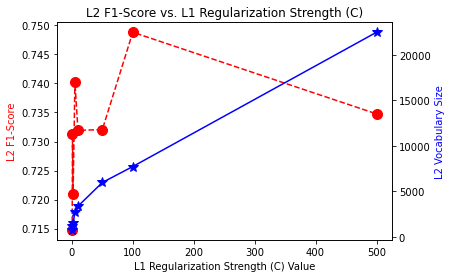

<Figure size 864x576 with 0 Axes>

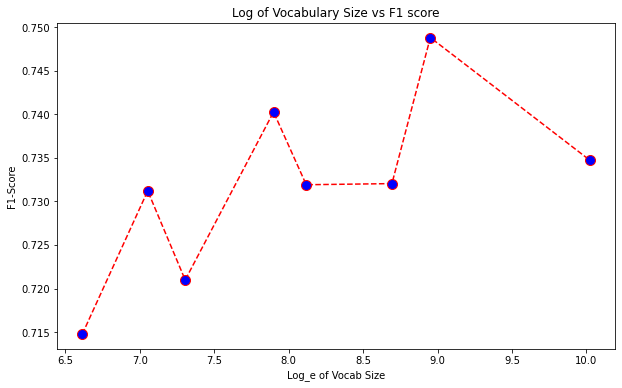

In [170]:
def P6():
    ### STUDENT START ###

    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    #transform the text features
    vectorizer = CountVectorizer()
    train_data_transformed = vectorizer.fit_transform(train_data).toarray()
    test_data_transformed = vectorizer.transform(test_data).toarray()

    #Loop over different regularization strengths and pring the F1 score for a logistic regression model
    f1_score_LR = []
    vocab_size = []
    step = 0.5
    
    c_range_i = [0.5, 1, 2, 5, 10, 50, 100, 500]#, 1000, 10000, 50000, 100000]
        
    #fit the logistic regression model and determine the sum of the weights
    for i in c_range_i:
        #find weights for the L1 logistic regression model
        LogisRegL1 = LogisticRegression(C=i, solver="liblinear", multi_class="auto", penalty = "l1", tol=0.015)
        LogisRegL1.fit(train_data_transformed, train_labels)
        weight_sum = np.sum(LogisRegL1.coef_, axis = 0)

        # find the index location where the sum of the weights is nonzero and turn into a np array
        idx = np.where(weight_sum != 0)[0]
        
        # filter the training and test data to these nonzero weights
        train_data_transformed2 = train_data_transformed[:, idx]
        test_data_transformed2 = test_data_transformed[:, idx]

        # use the new filter test and train data for a L2 logistic regression model
        LogisRegL2 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto", penalty = "l2", tol=0.015)
        LogisRegL2.fit(train_data_transformed2, train_labels)    

        #calculate f1 score and vocab size
        test_data_pred_LR = LogisRegL2.predict(test_data_transformed2)
        f1_score_LR.append(metrics.f1_score(test_labels, test_data_pred_LR, average="weighted"))
        vocab_size.append(idx.shape[0])


    print()
    print("Maximum F1-Score:",max(f1_score_LR),
          "at C =",c_range_i[f1_score_LR.index(max(f1_score_LR))])
    print()

    #print two y axis results for the f1 score and vocab size by regualrixation strength
    plt.figure(figsize=(12,8))
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(c_range_i, f1_score_LR, color='red', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    ax2.plot(c_range_i, vocab_size, color='blue', linestyle='solid', 
             marker='*',markerfacecolor='blue', markersize=10)

    plt.title('L2 F1-Score vs. L1 Regularization Strength (C)')
    ax1.set_xlabel('L1 Regularization Strength (C) Value')
    ax1.set_ylabel('L2 F1-Score', color='red')
    ax2.set_ylabel('L2 Vocabulary Size', color='blue')
    plt.show()
    
    plt.figure(figsize=(12,8))

    vocab_size_log = np.log(vocab_size)

    plt.figure(figsize=(10,6))
    plt.plot(vocab_size_log, f1_score_LR, color='red', linestyle='dashed', 
             marker='o',markerfacecolor='blue', markersize=10)
    plt.title('Log of Vocabulary Size vs F1 score')
    plt.xlabel('Log_e of Vocab Size')
    plt.ylabel('F1-Score')
    



    plt.show()

    ### STUDENT END ###

P6()

ANSWER:

* How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

    From part 4, we found that the maximum F1-Score was 0.749 at C = 0.39. Here we see that the F1 score hasn't really changed (i.e. equals 0.749) with the significant reduction vocabulary size (original vocab size ~ 33,000, new optimal ~ 25,000). 

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [154]:
def P7():
    ### STUDENT START ###
    #print the label names
    print('labels name order:',newsgroups_train.target_names)

    #transform the text features
    vectorizer = TfidfVectorizer()
    train_data_transformed = vectorizer.fit_transform(train_data).toarray()
    dev_data_transformed = vectorizer.transform(dev_data).toarray()

    #Create the logistic regression model and predict the labels on the development set
    LogisReg_tfid = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    LogisReg_tfid.fit(train_data_transformed, train_labels)
    dev_predictions = LogisReg_tfid.predict(dev_data_transformed)

    #find the label probabilites per observation (size: observations x number of labels)
    pred_prob = LogisReg_tfid.predict_proba(dev_data_transformed)

    #create a dictionary that stores the actual label by observation
    label_map = {label_name: i for i, label_name in enumerate(LogisReg_tfid.classes_)}

    #pull out the predicted probability of the actual label
    actual_prob = np.array([
       pred_prob[i, label_map[label_name]] for i, label_name in enumerate(dev_labels)
    ])

    #calculate the R ratio and determine it's accuracy
    R_ratio = np.max(pred_prob, axis = 1)/actual_prob
    print("R-ratio is incorrect ",
          round(np.count_nonzero(R_ratio != 1)/R_ratio.shape[0]*100,2),
          "% of times", sep = "", end = "\n\n")

    #determine the top n locations by R_ratio score
    n = 3
    top_n_tmp_loc = np.argsort(R_ratio)[::-1][0:n].tolist()
    top_n_tmp = np.sort(R_ratio)[::-1][0:n].tolist()
    
    #Look for trends in the errors. loop over the incorrect predictions and determine which pair of labels the model is most likely to get wrong.
    predicted_actual = []
    for i in top_n_tmp_loc:
        predicted_actual.append(str(newsgroups_train.target_names[dev_predictions[i]]) + 
                                "-" +
                                str(newsgroups_train.target_names[dev_labels[i]]))
    
    frequencies = np.asarray(np.unique(predicted_actual, return_counts=True)).T

    print("Top", n, "mismatches sorted by R-ratio:")
    print(frequencies[frequencies[:,1].astype(np.int).argsort()[::-1]])
    
    #results when n = 100
    # [['talk.religion.misc-alt.atheism' '25']
    #  ['alt.atheism-talk.religion.misc' '20']
    #  ['sci.space-alt.atheism' '15']
    #  ['alt.atheism-sci.space' '9']
    #  ['comp.graphics-sci.space' '7']
    #  ['sci.space-comp.graphics' '6']
    #  ['comp.graphics-talk.religion.misc' '6']
    #  ['sci.space-talk.religion.misc' '5']
    #  ['alt.atheism-comp.graphics' '4']
    #  ['talk.religion.misc-sci.space' '2']
    #  ['comp.graphics-alt.atheism' '1']]
    # seems to mix up religion and atheism the most (i.e. nearly 50%)

    #print the predicted label, actual label, 
    print("\n\nTop", n, "R-ratio documents:\n")
    for loc, i in enumerate(top_n_tmp_loc):
        print('R-ratio:', top_n_tmp[loc])
        print('predicted label:', newsgroups_train.target_names[dev_predictions[i]])
        print('predicted label probability:', pred_prob[i])
        print('actual label:', newsgroups_train.target_names[dev_labels[i]])
        print('actual label probability:', actual_prob[i])
        print('document:\n', dev_data[i], sep = "")
        print('\n------------------\n')

    
    ### STUDENT END ###

P7()

labels name order: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
R-ratio is incorrect 23.67% of times

Top 3 mismatches sorted by R-ratio:
[['comp.graphics-talk.religion.misc' '2']
 ['talk.religion.misc-alt.atheism' '1']]


Top 3 R-ratio documents:

R-ratio: 929.3581200665905
predicted label: comp.graphics
predicted label probability: [0.00196563 0.99371994 0.00324517 0.00106925]
actual label: talk.religion.misc
actual label probability: 0.0010692540599960857
document:
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a 

ANSWER:

* How is `TfidfVectorizer` different than `CountVectorizer`?

    TFID stands for the “term frequency – inverse document frequency”. For the TfidVectorizer method, a word's importance by document is based on if it shows up  often within that document and rarely in other documents of the corpus. The tf-formula is the term’s occurences in a document divided by the number of occurences of the most frequent word within that document. The Idf portion represents the inverse of the share of the documents in which the regarded term can be found.
    
    CountVectorizer meanwhile counts the frequency of all words in our corpus and grabs the most recurring features. As a result, the model may become biased as it can ignore some of the important less frequent features. TFID tries to fix this by trying to capture important features for a given document (the TF portion) even if it does not occur frequently in other documents (the IDF portion)


* Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

    The R-ratio is the ratio of the highest predicted probability that an observation belongs to a class from the predicted probability observation number x class number array devided by the predicted probability of the correct class from that same array. So when the R-ratio = 1, the highedst predicted probability is correct and when R > 1, it is incorrect. Values >> 1 occurs when the predicted probability has the actuall class probability closer to 0 than to the max predicted probability. The model seems to mix up religion and atheism the most (i.e. when I looked at the top 100 R-ratios, nearly 50% of the mislabled values were between the religion and atheism topics). Perhaps setting up explicit rules to classify the observations as either relgion or aethism if certain words are found my help reduce these errors (e.g. if mormon is stated, classify it as religion). This will likely missclassify some observations by this brute force method but it might help reduce the total number of errors. 



### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.

In [155]:
def P8():
    ### STUDENT START ###
    #print the label names
    print('labels name order:',newsgroups_train.target_names)

    #set hard rules
    religion_index = []
    aethism_index = []
    for i, document in enumerate(dev_data):
        if "mormon" in document.lower():
            religion_index.append(1)
        
        elif "mormon" not in document.lower():
            religion_index.append(0)
        
        if "aethist" in document.lower() or "aethism" in document.lower():
            aethism_index.append(1)
        
        elif "aethist" not in document.lower() or "aethism" not in document.lower():
            aethism_index.append(0)

    
    religion_index = np.array(religion_index)
    print(religion_index.mean())
    
    aethism_index = np.array(aethism_index)
    print(aethism_index.mean())

    
    #transform the text features
    vectorizer = TfidfVectorizer()
    train_data_transformed = vectorizer.fit_transform(train_data).toarray()
    dev_data_transformed = vectorizer.transform(dev_data).toarray()

    #Create the logistic regression model and predict the labels on the development set
    LogisReg_tfid = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    LogisReg_tfid.fit(train_data_transformed, train_labels)
    dev_predictions = LogisReg_tfid.predict(dev_data_transformed)

    #find the label probabilites per observation (size: observations x number of labels)
    pred_prob = LogisReg_tfid.predict_proba(dev_data_transformed)

    #create a dictionary that stores the actual label by observation
    label_map = {label_name: i for i, label_name in enumerate(LogisReg_tfid.classes_)}

    #pull out the predicted probability of the actual label
    actual_prob = np.array([
       pred_prob[i, label_map[label_name]] for i, label_name in enumerate(dev_labels)
    ])

    #calculate the R ratio and determine it's accuracy
    R_ratio = np.max(pred_prob, axis = 1)/actual_prob
    print("R-ratio is incorrect ",
          round(np.count_nonzero(R_ratio != 1)/R_ratio.shape[0]*100,2),
          "% of times", sep = "", end = "\n\n")
    
    #apply hard rule
    pred_prob_adjusted = pred_prob
    for i in range(len(religion_index)):
        religion_value = religion_index[i]
        aethism_value = aethism_index[i]
        
        if religion_value == 1:
            pred_prob_adjusted[i] = [0, 0, 0, pred_prob[i][3]]
        
        if aethism_value == 1:
            pred_prob_adjusted[i] = [pred_prob[i][0], 0, 0, 0]       
    
    R_ratio = np.max(pred_prob_adjusted, axis = 1)/actual_prob    
    print("R-ratio after applying the hard rule is incorrect ",
          round(np.count_nonzero(R_ratio != 1)/R_ratio.shape[0]*100,2),
          "% of times", sep = "", end = "\n\n")
    
    
    ### STUDENT END ###

P8()

labels name order: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
0.010355029585798817
0.0
R-ratio is incorrect 23.67% of times

R-ratio after applying the hard rule is incorrect 23.22% of times



Slight improvement by classifying all mormon documents as religion